# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [2]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [3]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

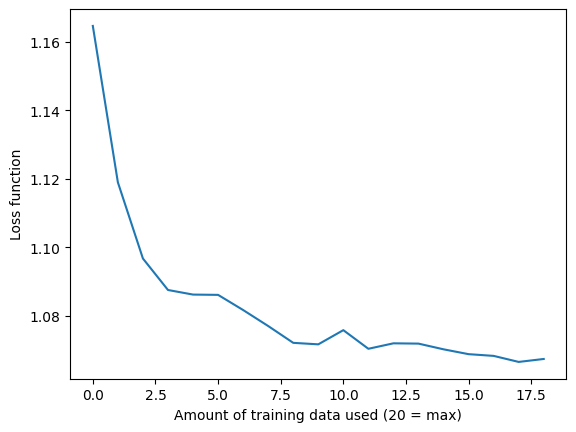

In [4]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [5]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

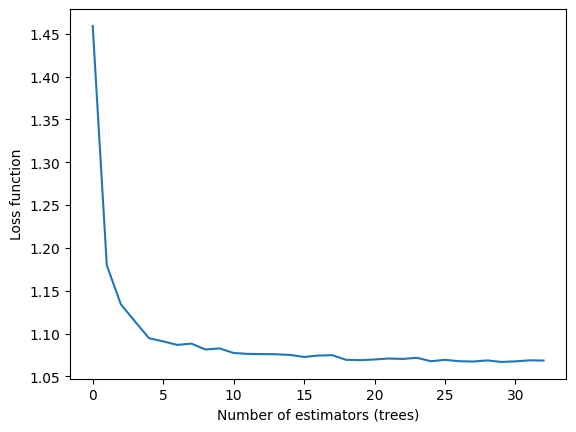

In [6]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [11]:
import pandas as pd

# Load the dataset
df_ren1 = pd.read_csv("IRENA_RenewableEnergy_Statistics_2000-2022.csv", encoding = 'latin -1')

# Peek at the data
print(df_ren1.shape)
print(df_ren1.columns)
df_ren1.head()


(35193, 12)
Index(['Region', 'Sub-region', 'Country', 'ISO3 code', 'M49 code',
       'RE or Non-RE', 'Group Technology', 'Technology', 'Producer Type',
       'Year', 'Electricity Generation (GWh)',
       'Electricity Installed Capacity (MW)'],
      dtype='object')


,Region,Sub-region,Country,ISO3 code,M49 code,RE or Non-RE,Group Technology,Technology,Producer Type,Year,Electricity Generation (GWh),Electricity Installed Capacity (MW)
0,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2000,24585.0,5459.01
1,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2001,25781.0,5455.50
2,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2002,26994.0,5891.01
3,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2003,28619.4,6013.24
4,Africa,Northern Africa,Algeria,DZA,12,Total Non-Renewable,Fossil fuels,Natural gas,On-grid electricity,2004,30312.0,6305.24


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, max_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values and focus on relevant columns
df_ren1 = df_ren1[['Region', 'Year', 'Group Technology', 'Electricity Installed Capacity (MW)']].dropna()

# Encode categorical variables
le_country = LabelEncoder()
le_tech = LabelEncoder()
df_ren1['Region'] = le_country.fit_transform(df_ren1['Region'])
df_ren1['Group Technology'] = le_tech.fit_transform(df_ren1['Group Technology'])

# Features and target
X = df_ren1[['Region', 'Year', 'Group Technology']]
y = df_ren1['Electricity Installed Capacity (MW)']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Hyperparameter tuning with RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best model after tuning
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print(f"\nBest Hyperparameters: {random_search.best_params_}")
print(f"R² Score: {r2:.4f}")
print(f"Max Error: {max_err:.2f}")
print(f"RMSE: {rmse:.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
R² Score: 0.0168
Max Error: 1109509.00
RMSE: 27450.43


# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight'

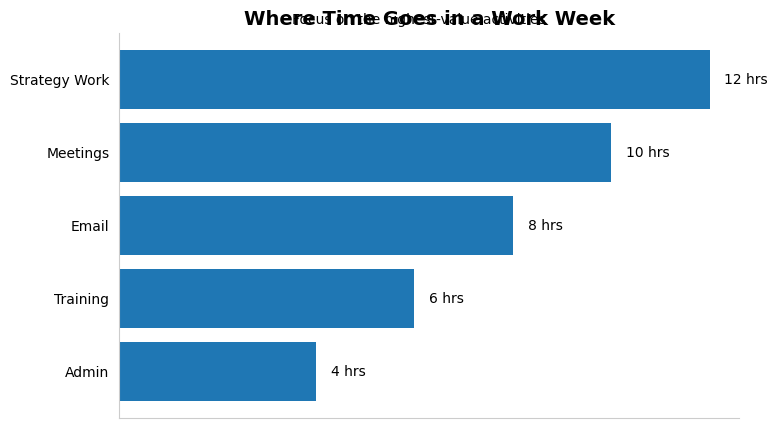

In [14]:
import matplotlib.pyplot as plt

# Fake but realistic data
categories = ['Email', 'Meetings', 'Strategy Work', 'Admin', 'Training']
hours = [8, 10, 12, 4, 6]

# Sort for better visual flow
sorted_data = sorted(zip(hours, categories))
hours_sorted, categories_sorted = zip(*sorted_data)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(categories_sorted, hours_sorted, color='#1f77b4')

# Add direct labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.3, bar.get_y() + bar.get_height()/2,
            f'{width} hrs', va='center', fontsize=10)

# Remove clutter
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.grid(False)
ax.set_xticks([])

# Add title and subtitle
ax.set_title("Where Time Goes in a Work Week", fontsize=14, fontweight='bold')
plt.suptitle("Focus on the highest-value activities", fontsize=10, y=0.92)

# Tight layout
plt.tight
